# 금융투자협회 채권정보
### 채권 데이터 가져오기 (기간 지정)

<img width="30%" src="https://i.imgur.com/gH0DdDK.jpg" >

http://www.kofiabond.or.kr

### 2017 http://financedata.kr

# 요약
* 저정한 기간의 날짜별 국고채권(1년) 등 17종류의 채권 수익률 호가 데이터
* 1995년 5월 1일~현재 (5,500일 이상의 일자별 데이터)
* 기간(시작일자, 끝 일자)와 조회시간 오전/오후를 지정하여 일간, 월간, 년간 조회
* 결과 데이터를 XML로 조회 (내부적으로 XML 서비스로 데이터 서비스)

# 금융투자협회 채권 수익률 (기간)

<img src="https://i.imgur.com/cEpbmq7.png" >

## 2) URL과 요청 헤더 확인

<img src="https://i.imgur.com/iTtxDGL.png" >

In [1]:
import requests

payload = """<?xml version="1.0" encoding="utf-8"?>
<message>
  <proframeHeader>
    <pfmAppName>BIS-KOFIABOND</pfmAppName>
    <pfmSvcName>BISLastAskPrcROPSrchSO</pfmSvcName>
    <pfmFnName>listTrm</pfmFnName>
  </proframeHeader>
  <systemHeader></systemHeader>
<BISComDspDatDTO>
  <val1>DD</val1>
  <val2>20120905</val2>
  <val3>20170905</val3>
  <val4>1530</val4>
  <val5>3000</val5>
  <val6>3007</val6>
  <val7>3016</val7>
  <val8>3003</val8>
  <val9>3009</val9>
  <val10>4000</val10>
</BISComDspDatDTO>
</message>
"""

r = requests.post('http://www.kofiabond.or.kr/proframeWeb/XMLSERVICES/', data=payload)
r.text[:1000] # 앞부분만 출력

'<?xml version="1.0" encoding="UTF-8"?><root><message><proframeHeader>\n<pfmAppName>BIS-KOFIABOND</pfmAppName>\n<pfmSvcName>BISLastAskPrcROPSrchSO</pfmSvcName>\n<pfmFnName>listTrm</pfmFnName>\n<pfmGlobalNo>54651e6a0afe009d6aaa3090cb6ce408</pfmGlobalNo>\n<pfmTrDate>20170906</pfmTrDate>\n<pfmTrTime>20170906083426666</pfmTrTime>\n<pfmClntIp>1.225.69.82</pfmClntIp>\n<pfmResponseDtal></pfmResponseDtal>\n</proframeHeader>\n<systemHeader>\n</systemHeader>\n<BISComDspDatListDTO>\n<dbio_affected_count_>0</dbio_affected_count_>\n<dbio_fetch_size_>0</dbio_fetch_size_>\n<dbio_fetch_seq_>0</dbio_fetch_seq_>\n<dbio_total_count_>1240</dbio_total_count_>\n<BISComDspDatDTO>\n<val1>최고</val1>\n<val2>3.12</val2>\n<val3>3.43</val3>\n<val4>2.88</val4>\n<val5>2.99</val5>\n<val6>3.48</val6>\n<val7>3.16</val7>\n<val8 />\n<val9 />\n<val10 />\n<val11 />\n<val12>20130624</val12>\n<val13>20130624</val13>\n<val14>20120917</val14>\n<val15>20130624</val15>\n<val16>20130624</val16>\n<val17>20120907</val17>\n<val18 />\

# XML to DataFrame

In [2]:
# XML to DataFrame

import xml.etree.ElementTree as ET
import pandas as pd

tree = ET.XML(r.content) 
all_records = []

element = tree.findall('message/BISComDspDatListDTO/BISComDspDatDTO')
for i, child in enumerate(element):
    record = {}
    for i, subchild in enumerate(child):
        record[subchild.tag] = subchild.text
    all_records.append(record)

df = pd.DataFrame(all_records)

print('row count:', len(df))
df[['val1', 'val2', 'val3', 'val4', 'val5', 'val6', 'val7']].head(20)

row count: 1240


,val1,val2,val3,val4,val5,val6,val7
0,최고,3.12,3.43,2.88,2.99,3.48,3.16
1,최저,1.203,1.217,1.245,1.226,1.628,1.34
2,2017-09-05,1.780,1.996,1.479,1.704,2.333,1.38
3,2017-09-04,1.782,2.001,1.482,1.708,2.335,1.38
4,2017-09-01,1.747,1.966,1.470,1.678,2.302,1.38
5,2017-08-31,1.747,1.968,1.476,1.684,2.304,1.38
6,2017-08-30,1.752,1.958,1.478,1.690,2.307,1.38
7,2017-08-29,1.772,1.975,1.489,1.708,2.322,1.38
8,2017-08-28,1.758,1.963,1.485,1.701,2.308,1.39
9,2017-08-25,1.755,1.960,1.482,1.698,2.306,1.39


# FormData 값 지정 (XML) 값으로 지정 된다

```XML
...
  <val1>DD</val1> <!-- 기간: DD=일간, MM=월간, YY=년간 -->
  <val2>20120905</val2> <!-- 조회기간 시작: YYYMMDD(일간), YYMM(월간), YY(년간) -->
  <val3>20170905</val3> <!-- 조회기간 끝: YYYMMDD(일간), YYMM(월간), YY(년간) -->
  <val4>1530</val4> <!-- 조회시간: 1130=오전, 1530=오후 -->
  <val5>3000</val5> <!-- 종류1 -->
  <val6>3007</val6> <!-- 종류2 -->
  <val7>3016</val7> <!-- 종류3 -->
  <val8>3003</val8> <!-- 종류4 -->
  <val9>3009</val9> <!-- 종류5 -->
  <val10>4000</val10> <!-- 종류6 -->
...
```

채권의 종류를 지정하는 부분(최대 6개): 

```XML
<val5>3000</val5><val6>3007</val6><val7>3016</val7><val8>3003</val8><val9>3009</val9><val10>4000</val10>
```

# 종류
최대 6개 지정, <val5/>에서 <val10/> 까지 (종류1~종류6 까지)


종류 | 코드
:--- | :----
3006 | 국고채권(1년) 
3000 | 국고채권(3년) 
3007 | 국고채권(5년) 
3013 | 국고채권(10년)
3014 | 국고채권(20년)
3017 | 국고채권(30년)
3018 | 국고채권(50년)
3008 | 국민주택1종(5년)
3015 | 통안증권(91일)
3016 | 통안증권(1년)
3003 | 통안증권(2년)
3002 | 한전채(3년)
3004 | 산금채(1년)
3009 | 회사채(무보증3년)AA|
3010 | 회사채(무보증3년)BBB-
4000 | CD(91일)
5000 | CP(91일)

# XML 문서의 항목 명칭과 컬럼명 매칭

In [3]:
# XML 문서의 항목 명칭과 컬럼명
    
col_maps = [
    ('val1', '일자'), # YYYY-MM-DD
    ('val2', '국고채권(3년)'), # <val5>3000</val5>
    ('val3', '국고채권(5년)'), # <val6>3007</val6>
    ('val4', '통안증권(1년)'), # <val7>3016</val7>
    ('val5', '통안증권(2년)'), # <val8>3003</val8>
    ('val6', '회사채(무보증3년)'), # <val9>3009</val9>
    ('val7', 'CD(91일)'), #  <val10>4000</val10>
]

In [4]:
col_names = [col[1] for col in col_maps]
col_names 

['일자', '국고채권(3년)', '국고채권(5년)', '통안증권(1년)', '통안증권(2년)', '회사채(무보증3년)', 'CD(91일)']

In [5]:
col_list= [col[0] for col in col_maps]
col_list

['val1', 'val2', 'val3', 'val4', 'val5', 'val6', 'val7']

# 사용할 컬럼만 추출

In [6]:
df = df[col_list].copy()

print('row count:', len(df))
df.head(10)

row count: 1240


,val1,val2,val3,val4,val5,val6,val7
0,최고,3.12,3.43,2.88,2.99,3.48,3.16
1,최저,1.203,1.217,1.245,1.226,1.628,1.34
2,2017-09-05,1.780,1.996,1.479,1.704,2.333,1.38
3,2017-09-04,1.782,2.001,1.482,1.708,2.335,1.38
4,2017-09-01,1.747,1.966,1.470,1.678,2.302,1.38
5,2017-08-31,1.747,1.968,1.476,1.684,2.304,1.38
6,2017-08-30,1.752,1.958,1.478,1.690,2.307,1.38
7,2017-08-29,1.772,1.975,1.489,1.708,2.322,1.38
8,2017-08-28,1.758,1.963,1.485,1.701,2.308,1.39
9,2017-08-25,1.755,1.960,1.482,1.698,2.306,1.39


# 처음 2개 row 삭제

In [7]:
df.head(5)

,val1,val2,val3,val4,val5,val6,val7
0,최고,3.12,3.43,2.88,2.99,3.48,3.16
1,최저,1.203,1.217,1.245,1.226,1.628,1.34
2,2017-09-05,1.780,1.996,1.479,1.704,2.333,1.38
3,2017-09-04,1.782,2.001,1.482,1.708,2.335,1.38
4,2017-09-01,1.747,1.966,1.470,1.678,2.302,1.38


In [8]:
df = df[2:]
df.head(5)

,val1,val2,val3,val4,val5,val6,val7
2,2017-09-05,1.780,1.996,1.479,1.704,2.333,1.38
3,2017-09-04,1.782,2.001,1.482,1.708,2.335,1.38
4,2017-09-01,1.747,1.966,1.470,1.678,2.302,1.38
5,2017-08-31,1.747,1.968,1.476,1.684,2.304,1.38
6,2017-08-30,1.752,1.958,1.478,1.690,2.307,1.38


# 컬럼의 타입 바꾸기 (str to float)

In [9]:
# 수치값으로
float_columns = ['val2', 'val3', 'val4', 'val5', 'val6', 'val7']
df[float_columns] = df[float_columns].astype(float)

# 날짜값으로
df['val1'] = pd.to_datetime(df['val1'])

df.head()

,val1,val2,val3,val4,val5,val6,val7
2,2017-09-05,1.780,1.996,1.479,1.704,2.333,1.38
3,2017-09-04,1.782,2.001,1.482,1.708,2.335,1.38
4,2017-09-01,1.747,1.966,1.470,1.678,2.302,1.38
5,2017-08-31,1.747,1.968,1.476,1.684,2.304,1.38
6,2017-08-30,1.752,1.958,1.478,1.690,2.307,1.38


In [10]:
df.dtypes

val1    datetime64[ns]
val2           float64
val3           float64
val4           float64
val5           float64
val6           float64
val7           float64
dtype: object

# 컬럼 이름 바꾸기

In [11]:
for col in col_maps:
    df.rename(columns={col[0] : col[1]}, inplace=True)
    
df.head()

,일자,국고채권(3년),국고채권(5년),통안증권(1년),통안증권(2년),회사채(무보증3년),CD(91일)
2,2017-09-05,1.780,1.996,1.479,1.704,2.333,1.38
3,2017-09-04,1.782,2.001,1.482,1.708,2.335,1.38
4,2017-09-01,1.747,1.966,1.470,1.678,2.302,1.38
5,2017-08-31,1.747,1.968,1.476,1.684,2.304,1.38
6,2017-08-30,1.752,1.958,1.478,1.690,2.307,1.38


# 함수로 정리

In [12]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
from datetime import datetime

payload_tmpl = """<?xml version="1.0" encoding="utf-8"?>
<message>
  <proframeHeader>
    <pfmAppName>BIS-KOFIABOND</pfmAppName>
    <pfmSvcName>BISLastAskPrcROPSrchSO</pfmSvcName>
    <pfmFnName>listTrm</pfmFnName>
  </proframeHeader>
  <systemHeader></systemHeader>
<BISComDspDatDTO>
  <val1>DD</val1>
  <val2>{start_date}</val2>
  <val3>{end_date}</val3>
  <val4>1530</val4>
  <val5>3000</val5>
  <val6>3007</val6>
  <val7>3016</val7>
  <val8>3003</val8>
  <val9>3009</val9>
  <val10>4000</val10>
</BISComDspDatDTO>
</message>
"""

def get_bond_interest_range(start_date=None, end_date=None):
    # start_date: "YYYYMMDD", end_date: "YYYYMMDD"
    if start_date is None:
        start_date = "19950501" # 1995년 5월 데이터 부터 
    if end_date is None:
        end_date = datetime.now().strftime("%Y%m%d")
    payload = payload_tmpl.format(start_date=start_date, end_date=end_date)
    r = requests.post('http://www.kofiabond.or.kr/proframeWeb/XMLSERVICES/', data=payload)

    # XML to DataFrame
    tree = ET.XML(r.content) 
    all_records = []
    element = tree.findall('message/BISComDspDatListDTO/BISComDspDatDTO')
    for i, child in enumerate(element):
        record = {}
        for i, subchild in enumerate(child):
            record[subchild.tag] = subchild.text
        all_records.append(record)

    df = pd.DataFrame(all_records)

    # XML 문서의 항목 명칭과 컬럼명 매칭
    col_maps = [
        ('val1', '일자'), # YYYY-MM-DD
        ('val2', '국고채권(3년)'), # <val5>3000</val5>, 코드와 항목
        ('val3', '국고채권(5년)'), # <val6>3007</val6>
        ('val4', '통안증권(1년)'), # <val7>3016</val7>
        ('val5', '통안증권(2년)'), # <val8>3003</val8>
        ('val6', '회사채(무보증3년)'), # <val9>3009</val9>
        ('val7', 'CD(91일)'), #  <val10>4000</val10>
    ]

    # 사용할 컬럼만 추출
    df = df[col_list].copy()

    # 처음 2개(최고, 최저) row 삭제
    df = df[2:]
    
    # 컬럼의 타입 바꾸기 (str to float)
    float_columns = ['val2', 'val3', 'val4', 'val5', 'val6', 'val7']
    df[float_columns] = df[float_columns].astype(float)

    # 컬럼의 타입 바꾸기 (날짜값으로)
    df['val1'] = pd.to_datetime(df['val1'])

    # 컬럼 이름 바꾸기
    for col in col_maps:
        df.rename(columns={col[0] : col[1]}, inplace=True)

    # 인덱스 지정
    df.set_index('일자', inplace=True)
    df.sort_index(inplace=True)
    return df

# 전체 조회

1995년 5월 ~ 현재까지 일자별 데이터

In [13]:
df = get_bond_interest_range()

print('row count:', len(df))
df.head()

row count: 5548


,국고채권(3년),국고채권(5년),통안증권(1년),통안증권(2년),회사채(무보증3년),CD(91일)
일자,,,,,,
1995-05-02,14.70,14.2,NaN,NaN,NaN,14.65
1995-05-03,14.75,14.2,NaN,NaN,NaN,14.65
1995-05-04,14.75,14.2,NaN,NaN,NaN,14.70
1995-05-08,14.70,14.2,NaN,NaN,NaN,14.80
1995-05-09,14.70,14.2,NaN,NaN,NaN,14.80


In [14]:
df.tail()

,국고채권(3년),국고채권(5년),통안증권(1년),통안증권(2년),회사채(무보증3년),CD(91일)
일자,,,,,,
2017-08-30,1.752,1.958,1.478,1.690,2.307,1.38
2017-08-31,1.747,1.968,1.476,1.684,2.304,1.38
2017-09-01,1.747,1.966,1.470,1.678,2.302,1.38
2017-09-04,1.782,2.001,1.482,1.708,2.335,1.38
2017-09-05,1.780,1.996,1.479,1.704,2.333,1.38


# 다양한 조회 예시

In [15]:
from datetime import datetime

dt = datetime(2017, 9 ,1)
df.loc[dt, '국고채권(5년)']

1.966

In [16]:
# 특정 날짜의 특정 채권의 수익률

df.loc['2017-01-10', '국고채권(5년)']

1.8280000000000001

In [17]:
# 날짜 범위 지정, 특정 채권의 수익률

df.loc['2017-01-01':'2017-01-30', '국고채권(3년)']

일자
2017-01-02    1.638
2017-01-03    1.617
2017-01-04    1.630
2017-01-05    1.607
2017-01-06    1.626
2017-01-09    1.663
2017-01-10    1.647
2017-01-11    1.653
2017-01-12    1.624
2017-01-13    1.635
2017-01-16    1.633
2017-01-17    1.628
2017-01-18    1.649
2017-01-19    1.677
2017-01-20    1.655
2017-01-23    1.640
2017-01-24    1.628
2017-01-25    1.647
2017-01-26    1.687
Name: 국고채권(3년), dtype: float64

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,4)

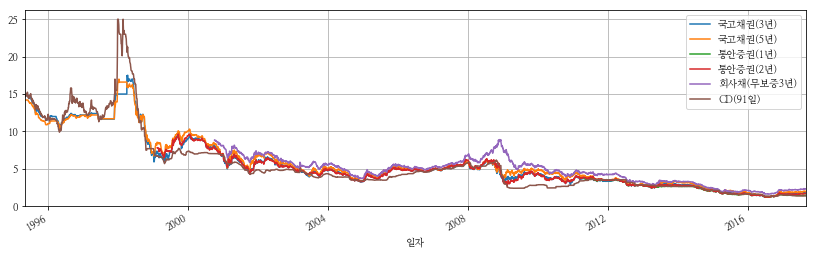

In [19]:
# 1995년 5월 ~ 현재, 채권 수익률 변동 추이

df.plot()

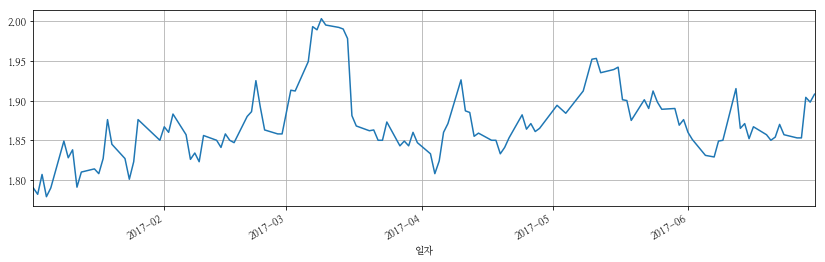

In [20]:
# 2017년 상반기 국고채권(5년) 수익률 변동

df.loc['2017-01-01':'2017-06-30', '국고채권(5년)'].plot()

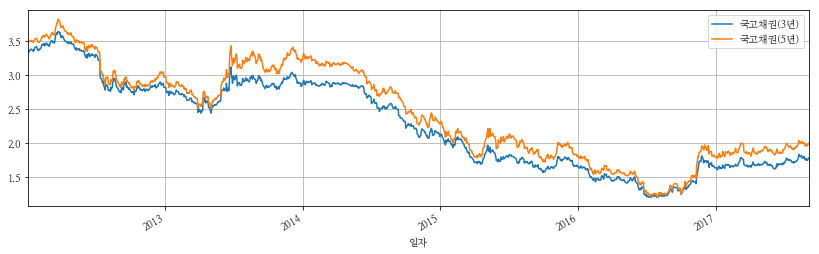

In [21]:
# 2012년~2017년, 국고채권(3년), 국고채권(5년) 수익률 비교

df.loc['2012':'2017', ['국고채권(3년)', '국고채권(5년)']].plot()


### 2017 http://financedata.kr